In [1]:
!pip install opencv-python

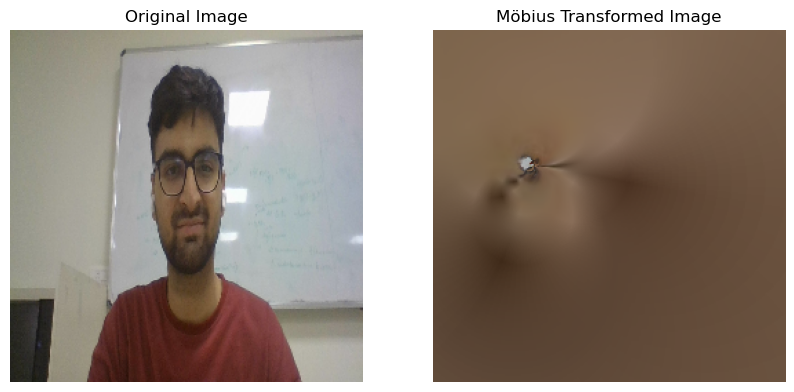

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image
def load_image(path, size=(256, 256)):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    return img

# Apply Möbius transformation to a complex number z
def mobius_transform(z, a, b, c, d):
    return (a * z + b) / (c * z + d)

# Generate a grid of complex numbers for the image
def generate_complex_grid(height, width):
    x = np.linspace(-1, 1, width)
    y = np.linspace(-1, 1, height)
    xv, yv = np.meshgrid(x, y)
    return xv + 1j * yv

# Apply Möbius transform to image
def apply_mobius_transform(image, a, b, c, d):
    h, w, _ = image.shape
    z = generate_complex_grid(h, w)
    z_transformed = mobius_transform(z, a, b, c, d)

    # Normalize the transformed coordinates to image indices
    z_transformed = np.nan_to_num(z_transformed)  # remove NaNs and infs
    x_new = np.real(z_transformed)
    y_new = np.imag(z_transformed)

    x_new = ((x_new - x_new.min()) / (x_new.max() - x_new.min())) * (w - 1)
    y_new = ((y_new - y_new.min()) / (y_new.max() - y_new.min())) * (h - 1)

    # Remap the image using OpenCV
    map_x = x_new.astype(np.float32)
    map_y = y_new.astype(np.float32)
    transformed = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

    return transformed

# Example usage
image_path = 'WIN_20250606_18_11_10_Pro.jpg'  # Replace with your image path
img = load_image(image_path)

# Random complex coefficients (no constraints)
a = np.random.rand() + 1j * np.random.rand()
b = np.random.rand() + 1j * np.random.rand()
c = np.random.rand() + 1j * np.random.rand()
d = np.random.rand() + 1j * np.random.rand()

# Ensure ad - bc ≠ 0 (to be invertible)
if a * d == b * c:
    d += 0.1

transformed_img = apply_mobius_transform(img, a, b, c, d)

# Display original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Möbius Transformed Image")
plt.imshow(transformed_img)
plt.axis('off')

plt.show()
